In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('DataSet/GlobalLandTemperaturesByCountry.csv', delimiter=',')

In [3]:
df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [4]:
df_country = df.Country.unique()

In [5]:
len(df_country)

243

In [6]:
df_c = df.drop('AverageTemperatureUncertainty', axis=1)

In [7]:
df_c = df_c[df_c.Country == "Cameroon"]

In [8]:
df_c = df_c.drop('Country',axis=1)

In [9]:
df_c.index = pd.to_datetime(df_c.dt)

In [10]:
df_c = df_c.drop('dt', axis=1)

In [11]:
df_c

,AverageTemperature
dt,
1856-01-01,23.696
1856-02-01,24.302
1856-03-01,25.557
1856-04-01,25.104
1856-05-01,24.169
...,...
2013-05-01,25.411
2013-06-01,24.694
2013-07-01,23.955


In [12]:
df_c = df_c.loc['1950-01-01':]

In [13]:
df_c[df_c.isnull()]
#df_c.isnull().sum()

,AverageTemperature
dt,
1950-01-01,NaN
1950-02-01,NaN
1950-03-01,NaN
1950-04-01,NaN
1950-05-01,NaN
...,...
2013-05-01,NaN
2013-06-01,NaN
2013-07-01,NaN


In [14]:
df_c = df_c.sort_index()

In [15]:
df_c.index

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=765, freq=None)

In [16]:
df_c.AverageTemperature.fillna(method='pad', inplace=True)

In [17]:
df_c[df_c.AverageTemperature.isnull()]

,AverageTemperature
dt,


In [18]:
df_c['Ticks'] = range(len(df_c.index.values))

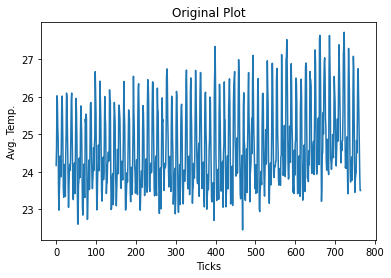

In [19]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'AverageTemperature', data = df_c);

In [20]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    # Determing rolling statistics
    roll_mean = ts.rolling(12).std()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

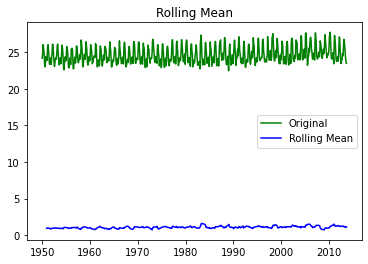

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-4.60017919481465, 0.00012907144067912917, 18, 746, {'1%': -3.439146171679794, '5%': -2.865422101274577, '10%': -2.568837245865348}, 962.0690597938938)
df_output: 
 Test Statistic                  -4.600179
p-value                          0.000129
#Lags Used                      18.000000
Number of Observations Used    746.000000
dtype: float64
Test Statistic                  -4.600179
p-value                          0.000129
#Lags Used                      18.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


In [21]:
stationarity_check(df_c.AverageTemperature)

In [22]:
df_c['Roll_Mean'] = df_c.AverageTemperature.rolling(12).std()

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

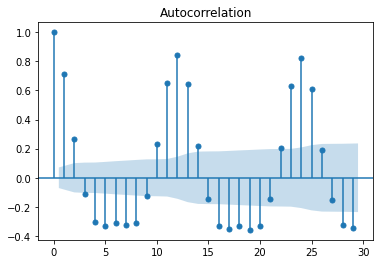

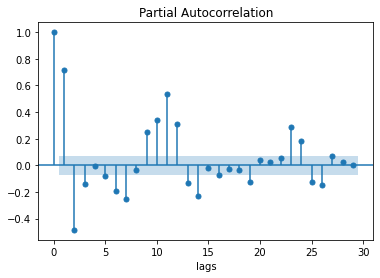

In [24]:
plot_acf(df_c.AverageTemperature)
plot_pacf(df_c.AverageTemperature)
plt.xlabel('lags')
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

c:\users\saurabh\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


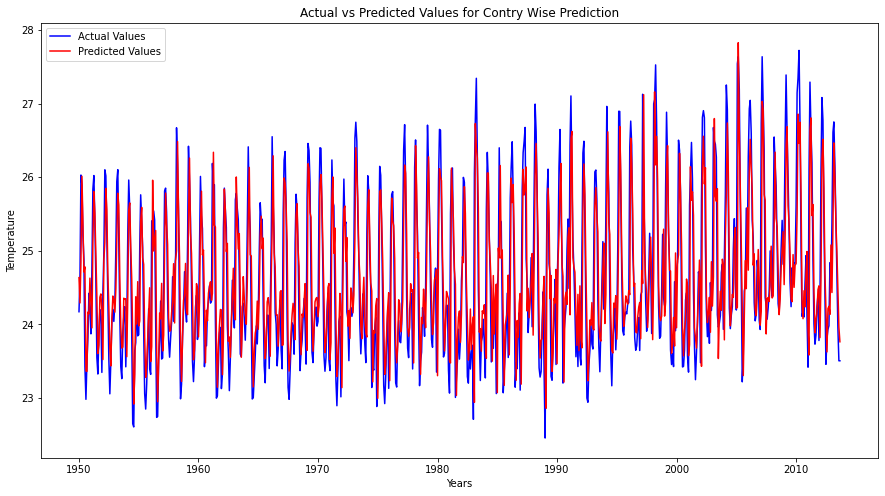

In [26]:
model = ARIMA(df_c.AverageTemperature, order=(1, 0, 2),freq="MS")  
results_MA = model.fit()  
#plt.plot(df_c.AverageTemperature)
#plt.plot(results_MA.fittedvalues, color='red')
#plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_c.AverageTemperature)**2).mean()))
#plt.show()


fig = plt.figure(figsize=(15, 8))
plt.plot(df_c.AverageTemperature, color = 'blue',label="Actual Values")
plt.plot(results_MA.fittedvalues, color = 'red',label="Predicted Values")
plt.title("Actual vs Predicted Values for Contry Wise Prediction")
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.legend(loc="upper left")
plt.show()
# #plt.savefig("Actual vs Predicted Values for Contry Wise Prediction")



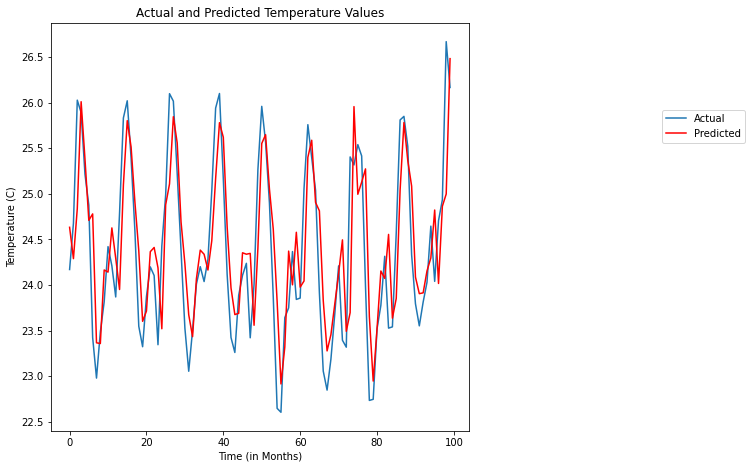

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(7.5,7.5))
plt.plot(list(df_c.AverageTemperature)[:100], label="Actual")
plt.plot(list(results_MA.fittedvalues)[:100], 'r', label="Predicted")
plt.xlabel("Time (in Months)")
plt.ylabel("Temperature (C)")
#plt.xticks(df_c.Ticks,list(results_MA.fittedvalues))
plt.title("Actual and Predicted Temperature Values")

plt.legend(loc='upper left', bbox_to_anchor=(1.45, 0.8))
plt.show()
plt.savefig("Actual vs Predicted Values for Contry Wise Prediction in Simple Form")

In [28]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [29]:
predictions = results_MA.predict('01/01/1950','04/01/2262')

In [30]:
print(predictions)

1950-01-01    24.633177
1950-02-01    24.289256
1950-03-01    24.838146
1950-04-01    26.010899
1950-05-01    25.383142
                ...    
2261-12-01    24.633177
2262-01-01    24.633177
2262-02-01    24.633177
2262-03-01    24.633177
2262-04-01    24.633177
Freq: MS, Name: predicted_mean, Length: 3748, dtype: float64


In [31]:
print(predictions['01/01/2262'])

24.63317712683936


In [32]:
#print(results_MA.predict('02/01/1970'))

In [33]:
print(predictions['07-01-2021'])

24.63317712683936
